# Initial Modeling 

In [65]:
import pandas as pd
import csv
from datetime import datetime, timedelta
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
import torch
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
try: 
    import torchbearer
except:
    !pip install torchbearer

## Import data

In [67]:
df_2class = pd.read_csv("data/df_2class_wNF.csv") #data of only class 424 from 2000 to 2010

In [69]:
df_2class["issuedate"] = pd.to_datetime(df_2class["issuedate"])

In [70]:
l = ["year", "class_424","herfindahl_cited_class", "herfindahl_cited_424subclass", "n_nplcites", "median_age_cited", "n_claims",\
    "count_by_assignee_all", "count_by_assignee_class", "counts_by_assignee_other",\
     "inl_by_assignee_all", "inl_by_assignee_424", "inl_by_assignee_other", \
     
     'st_country_class_0', 'st_country_class_1', 'st_country_class_2',
     'subclass_class_0', 'subclass_class_1', 'subclass_class_2', 'subclass_class_3', \
     "outl_by_assignee_all", "outl_by_assignee_424", "outl_by_assignee_other",\
     "inl_by_cited_all", "oul_by_cited_all"]

## Missing data

In [72]:
df_424.isna().sum()

patent                             0
st_country                         0
assignee                           0
class                              0
subclass                           0
issuedate                          0
nonutility                         0
appnum                             0
application_date                   0
n_claims                           0
claims_info_missing                0
n_bcites                           0
n_fcites                           0
n_nplcites                         0
inlinks_all                        0
inlinks_class                      0
FC3                                0
FC5                                0
FC10                               0
non_patent_refs                    0
median_age_cited                   0
count_by_assignee_all              0
count_by_assignee_class            0
inl_by_assignee_all                0
inl_by_assignee_424                0
median_date_cited               2122
inl_by_assignee_other              0
F

In [74]:
df_2class = df_2class.fillna(df_2class.mean())

<ipython-input-74-57f5cc9daa8e>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_424 = df_424.fillna(df_424.mean())
<ipython-input-74-57f5cc9daa8e>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_2class = df_2class.fillna(df_2class.mean())


## Separate target and training data

In [75]:
df_2class.columns

Index(['patent', 'st_country', 'assignee', 'subclass', 'issuedate',
       'nonutility', 'appnum', 'application_date', 'n_claims',
       'claims_info_missing', 'n_bcites', 'n_fcites', 'n_nplcites',
       'inlinks_all', 'inlinks_class', 'FC3', 'FC5', 'FC10', 'FC3_cat',
       'FC5_cat', 'FC10_cat', 'herfindahl_cited_class',
       'herfindahl_cited_424subclass', 'median_age_cited', 'median_date_cited',
       'asstype_1', 'asstype_2', 'asstype_3', 'asstype_4', 'asstype_5',
       'asstype_6', 'asstype_7', 'count_by_assignee_all',
       'count_by_assignee_class', 'inl_by_assignee_all', 'inl_by_assignee_424',
       'inl_by_assignee_other', 'FC3_cat_quartiles', 'FC5_cat_quartiles',
       'FC10_cat_quartiles', 'pagerank_order1', 'pagerank_order5',
       'pagerank_order2', 'pagerank_order3', 'pagerank_order4',
       'pagerank_order6', 'pagerank_order0', 'pagerank_order8',
       'pagerank_order7', 'sliding_window', 'pagerank_order9',
       'pagerank_order11', 'pagerank_order12', 'pag

In [76]:
df_2class["year"] = df_2class["issuedate"].dt.year

In [78]:
df_2class.shape

(46264, 71)

In [87]:
target_cols= ["sliding_window_12", "sliding_window",'pagerank_order0', 'pagerank_order1',\
       'pagerank_order2', 'pagerank_order3', 'pagerank_order4',\
       'pagerank_order5', 'pagerank_order6', 'pagerank_order7',\
       'pagerank_order8','inlinks_all', 'inlinks_class',  'FC3', 'FC5', 'FC10', \
                                              "FC3_cat", "FC5_cat", "FC10_cat", \
                                              "FC3_cat_quartiles", "FC5_cat_quartiles", "FC10_cat_quartiles"]


df_targets_2class = df_2class[target_cols].copy()
df_inputs_2class = df_2class.drop(target_cols, axis=1)
df_inputs_2class = df_2class[l]


In [88]:
df_inputs_2class.head()

,year,class_424,herfindahl_cited_class,herfindahl_cited_424subclass,n_nplcites,median_age_cited,n_claims,count_by_assignee_all,count_by_assignee_class,counts_by_assignee_other,...,st_country_class_2,subclass_class_0,subclass_class_1,subclass_class_2,subclass_class_3,outl_by_assignee_all,outl_by_assignee_424,outl_by_assignee_other,inl_by_cited_all,oul_by_cited_all
0,1990,1,0.265306,0.722222,8,2709.000000,46.0,14.000000,0.000000,14.000000,...,0,0,0,0,1,8.357143,10.444444,18.400000,74.214286,5.428571
1,1990,1,1.000000,1.000000,0,1505.000000,1.0,892.040737,173.453177,718.587561,...,0,0,0,0,1,6.107473,5.726049,11.882412,22.000000,0.000000
2,1990,1,0.781250,0.142857,0,896.000000,8.0,892.040737,173.453177,718.587561,...,1,1,0,0,0,6.107473,5.726049,11.882412,82.100000,4.400000
3,1990,1,1.000000,0.555556,0,1358.000000,20.0,22.000000,0.000000,22.000000,...,0,0,0,0,1,12.545455,22.250000,13.076923,39.000000,5.000000
4,1990,1,0.000000,0.000000,1,2079.248489,14.0,311.000000,46.000000,265.000000,...,0,1,0,0,0,6.466238,6.796875,8.789474,0.000000,0.000000


In [89]:
df_targets_2class.head()

,sliding_window_12,sliding_window,pagerank_order0,pagerank_order1,pagerank_order2,pagerank_order3,pagerank_order4,pagerank_order5,pagerank_order6,pagerank_order7,...,inlinks_class,FC3,FC5,FC10,FC3_cat,FC5_cat,FC10_cat,FC3_cat_quartiles,FC5_cat_quartiles,FC10_cat_quartiles
0,2.131543,2.686400,0.000031,1.560529e-05,6.562651e-06,2.930609e-06,1.877523e-06,1.457908e-06,1.286787e-06,1.214756e-06,...,31,1.0,5.0,29.0,0,1,3,3,3,3
1,0.272532,0.302383,0.000002,8.748619e-07,7.656084e-07,3.746407e-07,1.898667e-07,1.474326e-07,1.301599e-07,1.228738e-07,...,0,1.0,3.0,4.0,0,1,1,3,3,2
2,1.403111,1.501660,0.000007,7.912829e-06,3.653845e-06,1.917832e-06,1.151846e-06,8.944155e-07,7.896287e-07,7.454269e-07,...,5,1.0,1.0,4.0,0,0,1,3,2,2
3,1.286013,1.529110,0.000023,1.206492e-05,4.570037e-06,1.977614e-06,1.023470e-06,7.943902e-07,7.013220e-07,6.620634e-07,...,35,8.0,15.0,25.0,1,2,3,3,3,3
4,1.000000,1.000000,0.000002,4.181004e-06,2.147803e-06,1.184639e-06,7.652058e-07,5.941870e-07,5.245739e-07,4.952093e-07,...,0,0.0,0.0,1.0,0,0,0,2,1,1


## Preparing data

In [41]:
y = df_targets_2class["FC3_cat_quartiles"].values
X = df_inputs_2class.values / df_inputs_2class.values.max(axis=0)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

## Classifier Function

In [82]:
def random_forest_classifier(inputs, targets, acc = False, plot = True, ret = False):
    #VERY IMPORTANT

    if type(inputs) != list:
        y = targets.values
        X = inputs.values / inputs.values.max(axis=0)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)#, random_state=42)
#     X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
    
    else:
        X_train, y_train, X_test, y_test = inputs
    
    clf = RandomForestClassifier(n_estimators=10)#, random_state=0)
    clf = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    if plot == True:
        print("Accuracy: ", (pred == y_test).sum()/len(X_test))
        print("Count Predicted: ", np.unique(pred, return_counts=True)[1])
        print("Real Count: ", np.unique(y_test, return_counts=True)[1])
        c = np.unique(y_test, return_counts=True)[1]
        print("Accuracy Predicting Top class: ",max(c)/sum(c) )
        print("\n")
        print(classification_report(pred, y_test))

        print("\n")
        print(plot_confusion_matrix(clf, X_test, y_test))
    
    if ret == True:
        r = []
        pred = clf.predict(X_train)
        r.append((pred == y_train).sum()/len(X_train))
        pred = clf.predict(X_test)
        r.append((pred == y_test).sum()/len(X_test))
        
        r.append(pd.DataFrame(classification_report(pred, y_test ,output_dict=True)).transpose())

#         for i in set(y_test):
#             pred = clf.predict(X_test[np.where(y_test == i)])
#             r.append((pred == int(i)).sum()/(y_test == i).sum())
        
       
        return(r)
    if acc == True:
        return( (pred == y_test).sum()/len(X_test))

In [83]:
r = random_forest_classifier(df_inputs_2class, df_targets_2class["FC3_cat"], ret = True, plot = False)

In [84]:
r

[0.9762228260869565,
 0.7729106628242075,
               precision    recall  f1-score       support
 0              0.952553  0.799674  0.869444  12879.000000
 1              0.144326  0.428717  0.215953    982.000000
 2              0.047244  0.461538  0.085714     13.000000
 3              0.083333  0.333333  0.133333      6.000000
 accuracy       0.772911  0.772911  0.772911      0.772911
 macro avg      0.306864  0.505816  0.326111  13880.000000
 weighted avg   0.894148  0.772911  0.822158  13880.000000]

Accuracy:  0.5661526746620978
Count Predicted:  [2598 2551   76   28]
Real Count:  [2307 2566  298   82]
Accuracy Predicting Top class:  0.48848277174947646


              precision    recall  f1-score   support

           0       0.64      0.56      0.60      2598
           1       0.57      0.58      0.57      2551
           2       0.07      0.26      0.11        76
           3       0.22      0.64      0.33        28

    accuracy                           0.57      5253
   macro avg       0.37      0.51      0.40      5253
weighted avg       0.59      0.57      0.58      5253





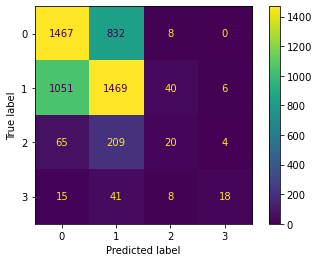

In [49]:
random_forest_classifier(df_inputs_2class, df_targets_2class["FC5_cat"])

Accuracy:  0.529178674351585
Count Predicted:  [3329 9346  612  593]
Real Count:  [4212 6600 1934 1134]
Accuracy Predicting Top class:  0.4755043227665706


              precision    recall  f1-score   support

           0       0.42      0.54      0.47      3329
           1       0.75      0.53      0.62      9346
           2       0.12      0.38      0.18       612
           3       0.30      0.58      0.40       593

    accuracy                           0.53     13880
   macro avg       0.40      0.51      0.42     13880
weighted avg       0.63      0.53      0.56     13880





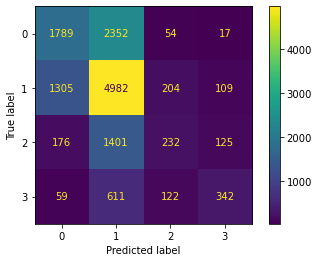

In [15]:
random_forest_classifier(df_inputs_2class, df_targets_2class["FC10_cat"])

Accuracy:  0.5991834774255523
Count Predicted:  [5297 3031]
Real Count:  [4521 3807]
Accuracy Predicting Top class:  0.5428674351585014


              precision    recall  f1-score   support

           2       0.72      0.61      0.66      5297
           3       0.46      0.58      0.51      3031

    accuracy                           0.60      8328
   macro avg       0.59      0.59      0.59      8328
weighted avg       0.62      0.60      0.61      8328





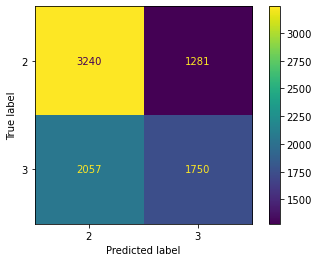

In [20]:
random_forest_classifier(df_inputs_2class, df_targets_2class["FC3_cat_quartiles"])

Accuracy:  0.45184918347742553
Count Predicted:  [2888 2871 2569]
Real Count:  [2725 2872 2731]
Accuracy Predicting Top class:  0.3448607108549472


              precision    recall  f1-score   support

           1       0.47      0.45      0.46      2888
           2       0.39      0.39      0.39      2871
           3       0.49      0.52      0.51      2569

    accuracy                           0.45      8328
   macro avg       0.45      0.45      0.45      8328
weighted avg       0.45      0.45      0.45      8328





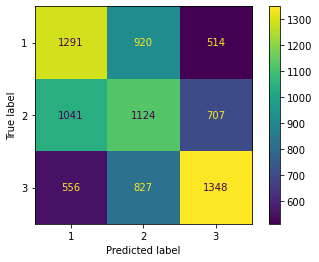

In [21]:
random_forest_classifier(df_inputs_2class, df_targets_2class["FC5_cat_quartiles"])

Accuracy:  0.4092219020172911
Count Predicted:  [ 973 1919 3445 1991]
Real Count:  [1360 2073 2749 2146]
Accuracy Predicting Top class:  0.33009125840537945


              precision    recall  f1-score   support

           0       0.27      0.38      0.32       973
           1       0.32      0.35      0.33      1919
           2       0.49      0.39      0.44      3445
           3       0.47      0.51      0.49      1991

    accuracy                           0.41      8328
   macro avg       0.39      0.41      0.39      8328
weighted avg       0.42      0.41      0.41      8328





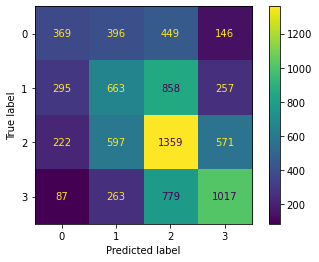

In [22]:
random_forest_classifier(df_inputs_2class, df_targets_2class["FC10_cat_quartiles"])

## Regressor Function

In [309]:
def random_forest_regressor(inputs, targets, rmse = False):

    if type(inputs) != list:
        y = targets.values
        X = inputs.values / inputs.values.max(axis=0)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)#, random_state=42)
  
    else:
        X_train, y_train, X_test, y_test = inputs  
    
    clf = RandomForestRegressor()#n_estimators=2000, random_state=0)
    clf = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)

    if rmse == True:
        return(np.sqrt(mean_squared_error(pred, y_test)), np.std(targets.values)) 
    
    return(pred, y_val)

In [306]:
from sklearn.model_selection import KFold
kf5 = KFold(n_splits=5, shuffle=False)


def regressor_results(target, kfold = False):
    res = []   
    rn = range(1, df_inputs_2class.shape[0])
    count = 0

    for train_index, test_index in kf5.split(rn):
        print("Model ", count + 1, " / " , 5)
        count+=1
                
        res_iter = []
        
        if kfold == True:
            inputs = [df_inputs_2class.iloc[train_index],  target[train_index], df_inputs_2class.iloc[test_index], target[test_index]]
        
        else:
            inputs  = df_inputs_2class
            
        r = random_forest_regressor(inputs, target, rmse = True)

        res.append(r)
    res = pd.DataFrame(res, columns = ["RMSE", "Standard Deviation"] )
    res["norm"] = res["RMSE"]/res["Standard Deviation"]
    return(res)

In [307]:
RMSE = []
std = []

r = regressor_results(df_targets_2class["FC3"], kfold = True)
r["norm"].describe()[1:3]

RMSE.append(r["norm"].describe()[1:3][0])
std.append(r["norm"].describe()[1:3][1])

Model  1  /  5
Root Mean Squared Error:  1.806037990054793
Standard Deviation:  2.0383062349806305
Model  2  /  5
Root Mean Squared Error:  2.055529001435381
Standard Deviation:  2.0383062349806305
Model  3  /  5
Root Mean Squared Error:  2.12135274511427
Standard Deviation:  2.0383062349806305
Model  4  /  5
Root Mean Squared Error:  1.9452400828843381
Standard Deviation:  2.0383062349806305
Model  5  /  5
Root Mean Squared Error:  1.8958223196894843
Standard Deviation:  2.0383062349806305


In [311]:
r = regressor_results(df_targets_2class["FC5"], kfold = True)
r["norm"].describe()[1:3]

RMSE.append(r["norm"].describe()[1:3][0])
std.append(r["norm"].describe()[1:3][1])

Model  1  /  5
Model  2  /  5
Model  3  /  5
Model  4  /  5
Model  5  /  5


mean    0.903918
std     0.073342
Name: norm, dtype: float64

In [312]:
r = regressor_results(df_targets_2class["FC10"], kfold = True)
r["norm"].describe()[1:3]

RMSE.append(r["norm"].describe()[1:3][0])
std.append(r["norm"].describe()[1:3][1])

Model  1  /  5
Model  2  /  5
Model  3  /  5
Model  4  /  5
Model  5  /  5


mean    0.854755
std     0.044768
Name: norm, dtype: float64

In [313]:
r = regressor_results(df_targets_2class["sliding_window_12"], kfold = True)
r["norm"].describe()[1:3]

Model  1  /  5
Model  2  /  5
Model  3  /  5
Model  4  /  5
Model  5  /  5


mean    0.884549
std     0.038989
Name: norm, dtype: float64

In [314]:
RMSE = [0.963936,  0.903918, 0.854755, 0.884549]
std =  [0.061612,  0.073342, 0.044768, 0.038989]

Text(0, 0.5, 'Normalised RMSE')

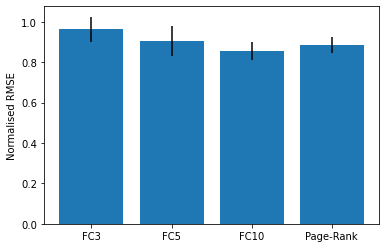

In [318]:
plt.bar(["FC3", "FC5", "FC10", "Page-Rank"], RMSE, yerr = std )
plt.ylabel("Normalised RMSE")

## Predicting PageRank

### Regression models

In [38]:
preds = []
for i in range(9):
    preds.append(random_forest_regressor(df_inputs_2class, df_targets_2class["pagerank_order{}".format(i)], rmse = True ))

preds.append(random_forest_regressor(df_inputs_2class, df_targets_2class["inlinks_all"], rmse = True))
preds.append(random_forest_regressor(df_inputs_2class, df_targets_2class["sliding_window"], rmse = True))

Root Mean Squared Error:  7.598320507464376e-06
Standard Deviation:  8.318353435463314e-06
Root Mean Squared Error:  2.8611110149361988e-06
Standard Deviation:  3.75712813883969e-06
Root Mean Squared Error:  1.5390984516372413e-06
Standard Deviation:  1.8986384517584932e-06
Root Mean Squared Error:  6.351111481629443e-07
Standard Deviation:  8.188024688974813e-07
Root Mean Squared Error:  6.278790759319487e-07
Standard Deviation:  6.995412499943299e-07
Root Mean Squared Error:  4.847985866874171e-07
Standard Deviation:  5.411049459436342e-07
Root Mean Squared Error:  4.2799395871183116e-07
Standard Deviation:  4.770719615216153e-07
Root Mean Squared Error:  4.0410215158859313e-07
Standard Deviation:  4.5014809111307466e-07
Root Mean Squared Error:  3.939801156771109e-07
Standard Deviation:  4.386437388381656e-07
Root Mean Squared Error:  10.897299547015281
Standard Deviation:  12.940000051216638
Root Mean Squared Error:  6.773264851246584e-07
Standard Deviation:  7.329864169782309e-07


In [39]:
preds = np.asarray(preds)

Text(0, 0.5, 'Normalised Error')

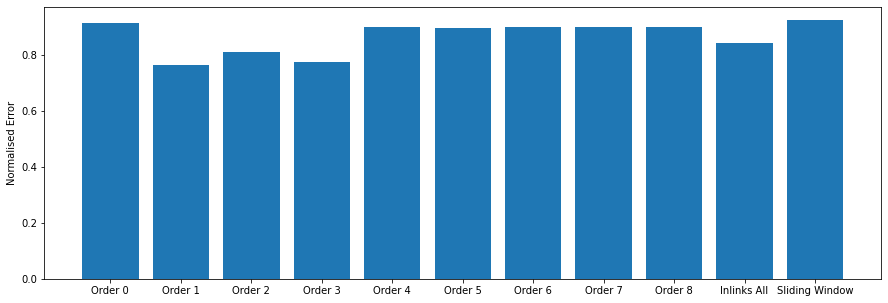

In [40]:
plt.figure(figsize = (15, 5))
plt.bar(["Order {}".format(i) for i in range(9)] + ["Inlinks All", "Sliding Window"], preds[:, 0]/ preds[:, 1])
plt.ylabel("Normalised Error")

### Classifying

In [91]:
def categorical_FC_quartiles(df, col, caps = None):
    ret = pd.DataFrame()

    FC_cat = np.full(len(df), 3)
    FC_cat[((df[col] > 0) & (df[col] < 2)).values].shape
    
    if caps == None:
        caps = df[col].describe().loc[["min", "25%", "50%", "75%"]].values  # [0,2,10,20]
    FC_cat = np.full(len(df), 3)
    print(col, caps)
    for cap in range(len(caps)-1):
        FC_cat[((df[col] >= caps[cap]) & (df[col] < caps[cap+1])).values] = cap


        
    return(FC_cat)

In [92]:
cat_pr = pd.DataFrame()
for i in ["inlinks_all", "FC3", "FC5", "FC10", "sliding_window_12"]:
    cat_pr[i] = categorical_FC_quartiles(df_2class, i)

inlinks_all [ 0.  2.  5. 12.]
FC3 [0. 0. 0. 1.]
FC5 [0. 0. 1. 3.]
FC10 [0. 1. 3. 9.]
sliding_window_12 [0.15172764 0.55880503 0.95776742 1.4047619 ]


In [93]:
cat_pr["FC10 original"] = categorical_FC_quartiles(df_2class, "FC10", caps = [0,2,10,20])
cat_pr["FC3 original"] = categorical_FC_quartiles(df_2class, "FC3", caps = [0,2,10,20])
cat_pr["FC5 original"] = categorical_FC_quartiles(df_2class, "FC3", caps = [0,2,10,20])

FC10 [0, 2, 10, 20]
FC3 [0, 2, 10, 20]
FC3 [0, 2, 10, 20]


In [85]:
from sklearn.model_selection import KFold
kf5 = KFold(n_splits=5, shuffle=False)

def classifier_results(target, kfold = False):
    res = []   
    rn = range(1, df_inputs_2class.shape[0])
    count = 0

    for train_index, test_index in kf5.split(rn):
        print("Model ", count + 1, " / " , 5)
        count+=1
        
        res_iter = []
        
        if kfold == True:
            inputs = [df_inputs_2class.iloc[train_index],  target[train_index], df_inputs_2class.iloc[test_index], target[test_index]]
        
        else:
            inputs  = df_inputs_2class
            
        r = random_forest_classifier(inputs, target, ret = True, plot = False)
        res_iter.append(r[0])
        res_iter.append(r[1])

        for c in range(len(r[2]) -3):
            res_iter.append(r[2]["precision"][c])
            res_iter.append(r[2]["recall"][c])
        res.append(res_iter)

    res = np.asarray(res)

    t = []
    for i in [["Precision " + str(i), "Recall " + str(i) ]for i in range(len(r[2]) -3) ]:
        t += i
    return(pd.DataFrame(res, columns = ["Train acc", "Test acc"] + t))

In [1]:
r = classifier_results(cat_pr["FC3 original"])

In [55]:
(r.describe().iloc[1:3] * 100).round(2)

,Train acc,Test acc,Precision 0,Recall 0,Precision 1,Recall 1,Precision 2,Recall 2,Precision 3,Recall 3
mean,97.81,72.55,92.28,75.89,19.94,46.54,8.95,50.49,8.33,40.00
std,0.13,0.28,0.45,0.38,1.00,1.22,3.11,13.72,10.27,41.83


In [56]:
r

,Train acc,Test acc,Precision 0,Recall 0,Precision 1,Recall 1,Precision 2,Recall 2,Precision 3,Recall 3
0,0.976911,0.725300,0.920544,0.760199,0.205968,0.463175,0.081633,0.571429,0.250000,0.5
1,0.977727,0.725490,0.918547,0.762161,0.196442,0.445378,0.116279,0.555556,0.000000,0.0
2,0.976993,0.729678,0.927736,0.760656,0.191710,0.468354,0.119048,0.625000,0.000000,0.0
3,0.979603,0.721683,0.927536,0.752297,0.189496,0.475089,0.088235,0.272727,0.066667,1.0
4,0.979359,0.725490,0.919676,0.759179,0.213246,0.474878,0.042553,0.500000,0.100000,0.5


In [2]:
r = classifier_results(cat_pr["FC5 original"])

In [58]:
(r.describe().iloc[1:3] * 100).round(2)

,Train acc,Test acc,Precision 0,Recall 0,Precision 1,Recall 1,Precision 2,Recall 2,Precision 3,Recall 3
mean,97.78,72.78,92.52,76.05,19.97,46.76,7.16,62.24,5.08,26.67
std,0.11,0.32,0.46,0.58,1.51,1.73,1.67,16.87,7.05,43.46


In [59]:
r = classifier_results(cat_pr["FC10 original"])

Model  1  /  5
Model  2  /  5
Model  3  /  5
Model  4  /  5
Model  5  /  5


In [60]:
(r.describe().iloc[1:3] * 100).round(2)

,Train acc,Test acc,Precision 0,Recall 0,Precision 1,Recall 1,Precision 2,Recall 2,Precision 3,Recall 3
mean,98.25,50.51,30.17,38.87,73.97,56.05,20.71,33.76,31.03,50.99
std,0.11,0.39,1.00,0.73,1.11,1.12,1.41,1.80,2.02,2.27


In [193]:
r = classifier_results(cat_pr["FC3"])

Model  1  /  5
Model  2  /  5
Model  3  /  5
Model  4  /  5
Model  5  /  5


In [194]:
r.describe().iloc[1:3]

,Train acc,Test acc,Precision 0,Recall 0,Precision 1,Recall 1
mean,0.999858,0.612363,0.730861,0.620978,0.472202,0.597276
std,0.000028,0.005165,0.007889,0.005484,0.008896,0.007477


In [195]:
r = classifier_results(cat_pr["FC5"])
(r.describe().iloc[1:3] * 100).round(2)

Model  1  /  5
Model  2  /  5
Model  3  /  5
Model  4  /  5
Model  5  /  5


,Train acc,Test acc,Precision 0,Recall 0,Precision 1,Recall 1,Precision 2,Recall 2
mean,0.999827,0.467839,0.488037,0.471785,0.378751,0.400311,0.543726,0.531431
std,0.000064,0.002057,0.014247,0.004353,0.006467,0.006903,0.009900,0.006420


In [260]:
r = classifier_results(cat_pr["FC10"], kfold = True)
(r.describe().iloc[1:3] * 100).round(2)

Model  1  /  5
Model  2  /  5
Model  3  /  5
Model  4  /  5
Model  5  /  5


,Train acc,Test acc,Precision 0,Recall 0,Precision 1,Recall 1,Precision 2,Recall 2,Precision 3,Recall 3
mean,99.98,42.12,22.97,38.77,30.98,36.09,52.83,39.93,51.25,52.86
std,0.00,1.02,1.85,3.92,3.48,1.43,4.46,1.38,1.41,2.88


In [261]:
r = classifier_results(cat_pr["sliding_window_12"])


Model  1  /  5
Model  2  /  5
Model  3  /  5
Model  4  /  5
Model  5  /  5


In [262]:
(r.describe().iloc[1:3] * 100).round(2)

,Train acc,Test acc,Precision 0,Recall 0,Precision 1,Recall 1,Precision 2,Recall 2,Precision 3,Recall 3
mean,99.99,48.64,67.77,51.67,40.36,37.12,37.28,54.61,49.03,53.58
std,0.00,0.47,0.94,0.98,1.24,0.53,0.76,0.62,0.66,1.08


(array([11566.,     0.,     0., 11566.,     0.,     0., 11564.,     0.,
            0., 11568.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

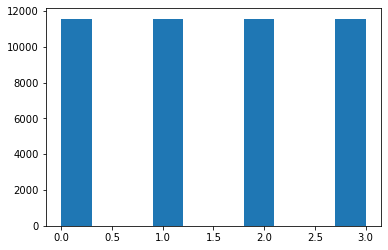

In [94]:
plt.hist(cat_pr["sliding_window_12"])

(array([ 7703.,     0.,     0., 11393.,     0.,     0., 15459.,     0.,
            0., 11709.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

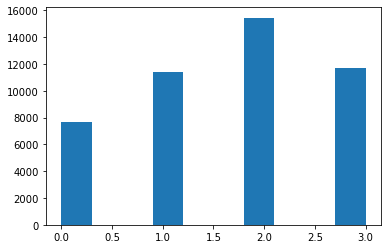

In [95]:
plt.hist(cat_pr["FC10"])

(array([25198.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 21066.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 10 artists>)

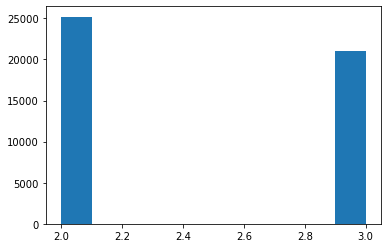

In [96]:
plt.hist(cat_pr["FC3"])

Accuracy:  0.7803314121037463
Count Predicted:  [13133   732     9     6]
Real Count:  [10804  2934   122    20]
Accuracy Predicting Top class:  0.7783861671469741


              precision    recall  f1-score   support

           0       0.97      0.80      0.87     13133
           1       0.12      0.48      0.19       732
           2       0.07      0.89      0.12         9
           3       0.15      0.50      0.23         6

    accuracy                           0.78     13880
   macro avg       0.33      0.67      0.36     13880
weighted avg       0.92      0.78      0.84     13880





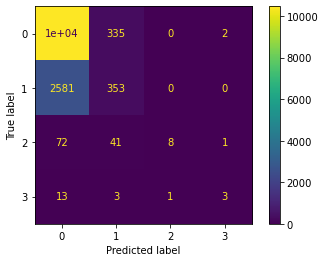

In [26]:
random_forest_classifier(df_inputs_2class, cat_pr["FC3 original"])

Accuracy:  0.5277377521613833
Count Predicted:  [3301 9390  625  564]
Real Count:  [4212 6600 1934 1134]
Accuracy Predicting Top class:  0.4755043227665706


              precision    recall  f1-score   support

           0       0.42      0.53      0.47      3301
           1       0.76      0.53      0.62      9390
           2       0.13      0.39      0.19       625
           3       0.29      0.58      0.39       564

    accuracy                           0.53     13880
   macro avg       0.40      0.51      0.42     13880
weighted avg       0.63      0.53      0.56     13880





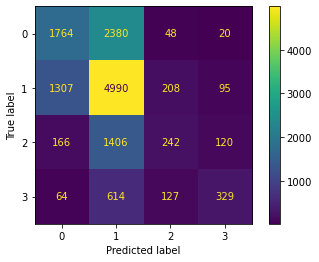

In [28]:
random_forest_classifier(df_inputs_2class, cat_pr["FC10 original"])

Accuracy:  0.42586455331412104
Count Predicted:  [1518 3010 5913 3439]
Real Count:  [2310 3439 4678 3453]
Accuracy Predicting Top class:  0.3370317002881844


              precision    recall  f1-score   support

           0       0.25      0.38      0.30      1518
           1       0.31      0.36      0.33      3010
           2       0.52      0.41      0.46      5913
           3       0.53      0.53      0.53      3439

    accuracy                           0.43     13880
   macro avg       0.40      0.42      0.41     13880
weighted avg       0.45      0.43      0.43     13880





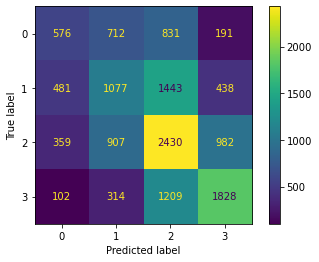

In [29]:
random_forest_classifier(df_inputs_2class, cat_pr["FC10"])

Accuracy:  0.4781700288184438
Count Predicted:  [4478 3817 2489 3096]
Real Count:  [3468 3434 3467 3511]
Accuracy Predicting Top class:  0.25295389048991357


              precision    recall  f1-score   support

           0       0.66      0.51      0.58      4478
           1       0.40      0.36      0.38      3817
           2       0.39      0.54      0.45      2489
           3       0.46      0.52      0.49      3096

    accuracy                           0.48     13880
   macro avg       0.48      0.48      0.47     13880
weighted avg       0.50      0.48      0.48     13880





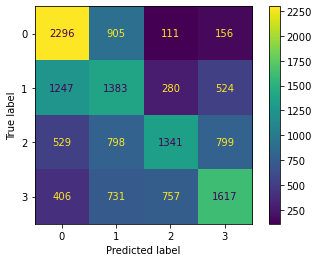

In [27]:
random_forest_classifier(df_inputs_2class, cat_pr["sliding_window_12"])

In [44]:
accs = []
for i in range(9):
    accs.append(random_forest_classifier(df_inputs_2class, cat_pr["pagerank_order" + str(i)], plot = False, acc = True))
    
accs.append(random_forest_classifier(df_inputs_2class, cat_pr["inlinks_all"], plot = False, acc = True))
accs.append(random_forest_classifier(df_inputs_2class, df_targets_2class["FC10_cat_quartiles"], plot = False, acc = True))
accs.append(random_forest_classifier(df_inputs_2class, cat_pr["sliding_window"], plot = False, acc = True))

Text(0, 0.5, 'Accuracy')

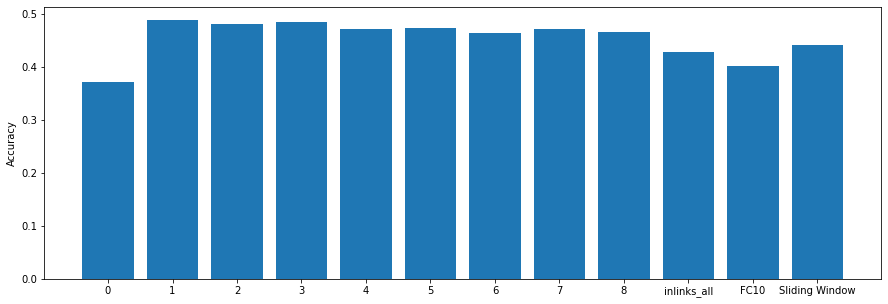

In [46]:
_, ax = plt.subplots(1, figsize = (15, 5))

labels = [str(i) for i in range(9)]
labels += ["inlinks_all", "FC10", "Sliding Window"]

ax.bar(labels, accs)
ax.set_ylabel("Accuracy")


In [74]:
def get_bins(array):
    return(10**np.linspace(np.log10(array.min()), np.log10(array.max()), 50))

Text(0, 0.5, 'Number of patents')

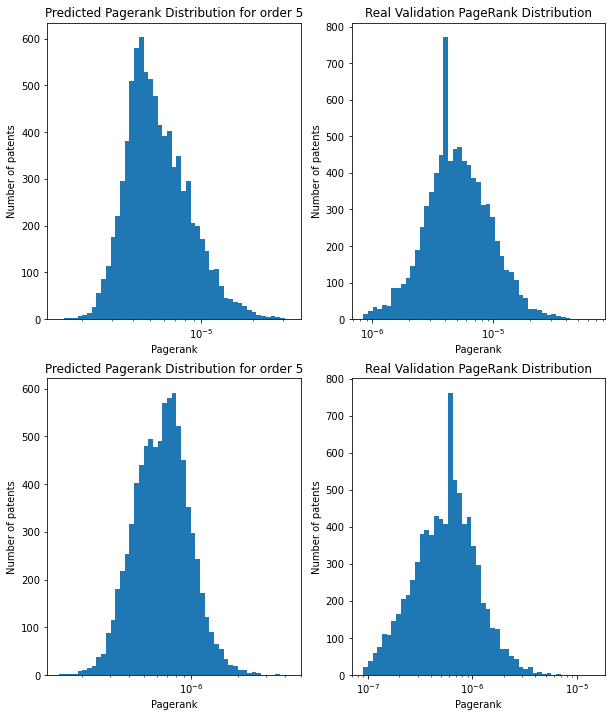

In [76]:
_, ax = plt.subplots(2,2, figsize = (10, 12))

ax[0][0].set_title("Predicted Pagerank Distribution for order 5")
ax[0][0].hist(pred_pr_o1, bins = get_bins(pred_pr_o1))
ax[0][0].set_xscale("log")
ax[0][0].set_xlabel("Pagerank")
ax[0][0].set_ylabel("Number of patents")

ax[0][1].set_title("Real Validation PageRank Distribution")
ax[0][1].hist(y_val_pr_o1.numpy(), bins = get_bins(y_val_pr_o1))
ax[0][1].set_xscale("log")
ax[0][1].set_xlabel("Pagerank")
ax[0][1].set_ylabel("Number of patents")

ax[1][0].set_title("Predicted Pagerank Distribution for order 5")
ax[1][0].hist(pred_pr, bins = get_bins(pred_pr))
ax[1][0].set_xscale("log")
ax[1][0].set_xlabel("Pagerank")
ax[1][0].set_ylabel("Number of patents")

ax[1][1].set_title("Real Validation PageRank Distribution")
ax[1][1].hist(y_val_pr.numpy(), bins = get_bins(y_val_pr))
ax[1][1].set_xscale("log")
ax[1][1].set_xlabel("Pagerank")
ax[1][1].set_ylabel("Number of patents")

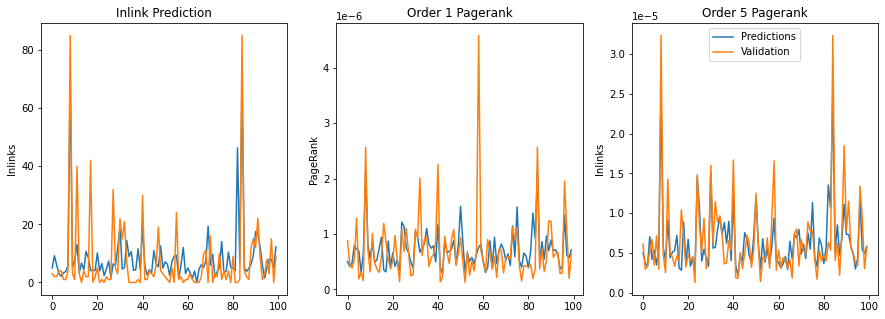

In [120]:
_, ax = plt.subplots(1,3, figsize = (15, 5))
np.random.seed(13) #13
index = np.random.choice(len(pred_10), 100)

ax[0].plot(pred_class[index], label = "Predictions")
ax[0].plot(y_val_class[index], label = "Validation")
ax[0].set_ylabel("Inlinks")
ax[0].set_title("Inlink Prediction")

ax[1].plot(pred_pr[index], label = "Predictions")
ax[1].plot(y_val_pr[index], label = "Validation")
ax[1].set_ylabel("PageRank")
ax[1].set_title("Order 1 Pagerank")

ax[2].plot(pred_pr_o1[index], label = "Predictions")
ax[2].plot(y_val_pr_o1[index], label = "Validation")
ax[2].set_ylabel("Inlinks")
ax[2].set_title("Order 5 Pagerank")

plt.legend()

## Same neural net

In [210]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F


class BaselineModel(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, out_size)

    def forward(self, x):
        out = self.fc1(x)
        out = torch.sigmoid(out)
        out = self.fc2(out)    
        out = torch.sigmoid(out)
        out = self.fc3(out)
#         out = F.softmax(out)
        if not self.training:
            out = F.softmax(out, dim=1)
        return out



In [211]:
torch.unique(y_train)

tensor([0, 1, 2, 3])

In [3]:
model = BaselineModel(X_train.shape[1], 100, len(torch.unique(y_train)))

loss_function = nn.CrossEntropyLoss() #includes softmax
optimiser = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

train_metrics = []
loss_eval = []
# the epoch loop
for epoch in range(100):
    inputs, labels = X_train, y_train

    # zero the parameter gradients
    optimiser.zero_grad()
    outputs = model(inputs)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimiser.step()

    outputs = outputs.detach().numpy()
#     print(set(outputs.argmax(axis = 1)))
    train_metrics.append((loss.item(), accuracy_score(labels, outputs.argmax(axis = 1))))
    
    model.eval()

    val_inputs, val_labels = X_val, y_val

    outputs = model(val_inputs)
    outputs = outputs.detach().numpy()

    loss_eval.append(accuracy_score(val_labels, outputs.argmax(axis = 1)))
    if epoch %1==0:
        print("Epoch %d, train loss %4.2f" % (epoch, loss.item()))
print('**** Finished Training ****')



In [213]:
train_metrics = np.asarray(train_metrics)

Text(0, 0.5, 'Training Cross Entropy Loss')

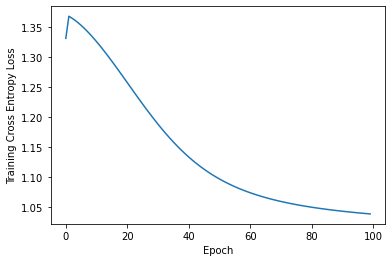

In [215]:
plt.plot(train_metrics[:, 0])
plt.xlabel("Epoch")
plt.ylabel("Training Cross Entropy Loss")

Text(0, 0.5, 'Training Accuracy')

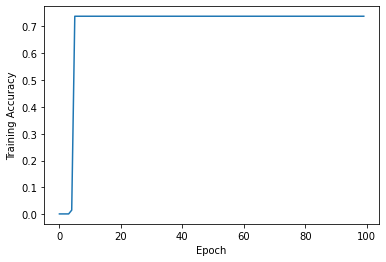

In [216]:
plt.plot(train_metrics[:, 1])
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")

Text(0, 0.5, 'Test Accuracy')

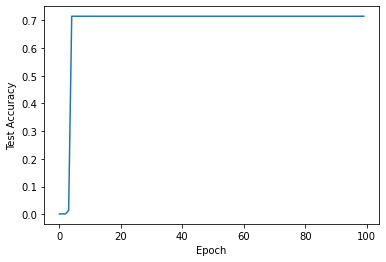

In [217]:
plt.plot(loss_eval)
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")

In [218]:
model.eval()
outputs = model(X_val)

In [222]:
preds = outputs.argmax(axis = 1).numpy()

In [225]:
preds.shape, y_val.shape

((1401,), torch.Size([1401]))

In [226]:
set(preds) # predicts all zeros

{0}

# TorchBearer

In [187]:
model = BaselineModel(X_train.shape[1], 100, len(torch.unique(y_train)))

loss_function = nn.CrossEntropyLoss() #includes softmax
optimiser = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

trial = torchbearer.Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy', "cat_acc"])


In [188]:
trial.with_data(X_train, y_train, x_val=X_val, y_val=y_val, x_test=X_test)#, X_test, y_test)

In [214]:
def get_stuff(inp, list_dics):
    return([i[inp] for i in list_dics])

In [218]:
train_hist[0].keys()

dict_keys(['running_loss', 'running_acc', 'loss', 'acc', 'val_loss', 'val_acc', 'train_steps', 'validation_steps'])

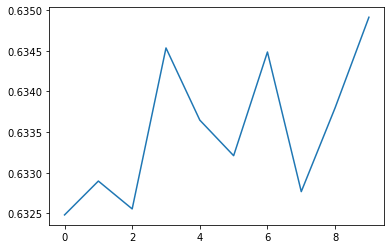

In [220]:
plt.plot(get_stuff("loss", train_hist))

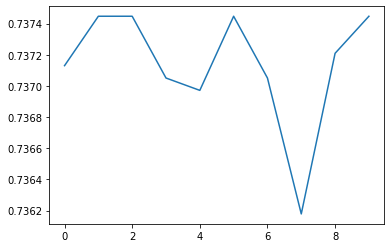

In [221]:
plt.plot(get_stuff("acc", train_hist))

## SVMs

In [227]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [228]:
pred = clf.predict(X_val)

In [234]:
(pred == y_val.numpy()).sum()/len(X_val)

0.715203426124197